In [ ]:
!pip install datasets
import datasets
import pandas as pd

import transformers

import shap

# load the emotion dataset
dataset = datasets.load_dataset("emotion", split="train")
data = pd.DataFrame({"text": dataset["text"], "emotion": dataset["label"]})

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import torch

# load the model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion", use_fast=True)
# Check if a GPU is available and if CUDA is supported
if torch.cuda.is_available():
    device = torch.device("cuda")
    model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion").to(device) # Load model to GPU
    print("GPU is available and model loaded to CUDA.")
else:
    device = torch.device("cpu")
    model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion") # Load model to CPU
    print("GPU not available, using CPU instead.")

# build a pipeline object to do predictions
pred = transformers.pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1,  # Set device based on GPU availability
    return_all_scores=True,
)

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cpu


GPU not available, using CPU instead.


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
!pip install shap

In [ ]:
explainer = shap.Explainer(pred)

In [ ]:
shap_values = explainer(data["text"][:3])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  67%|██████▋   | 2/3 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [01:19, 39.84s/it]


In [ ]:
shap.plots.text(shap_values)

In [ ]:
shap.plots.text(shap_values[:, :, "anger"])

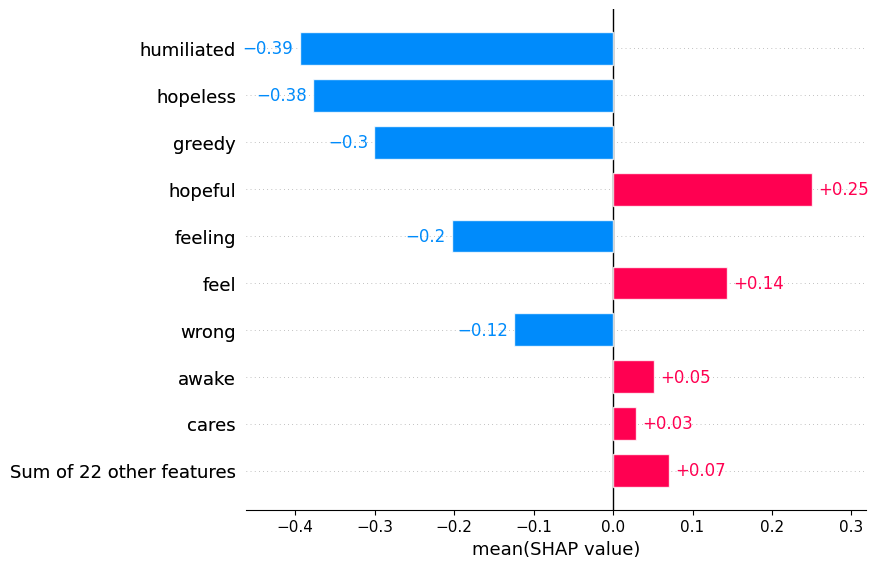

In [ ]:
shap.plots.bar(shap_values[:, :, "joy"].mean(0))

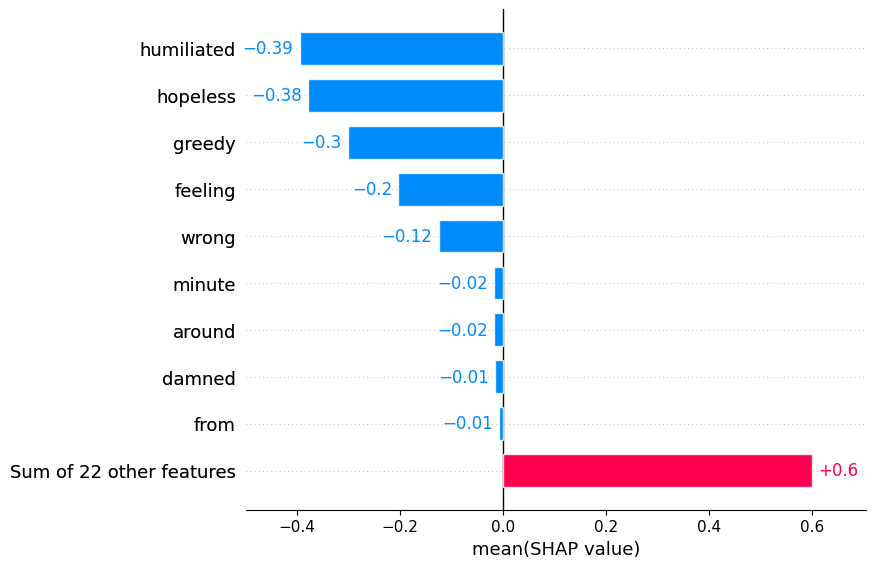

In [ ]:
# we can sort the bar chart in decending order
shap.plots.bar(shap_values[:, :, "joy"].mean(0), order=shap.Explanation.argsort)

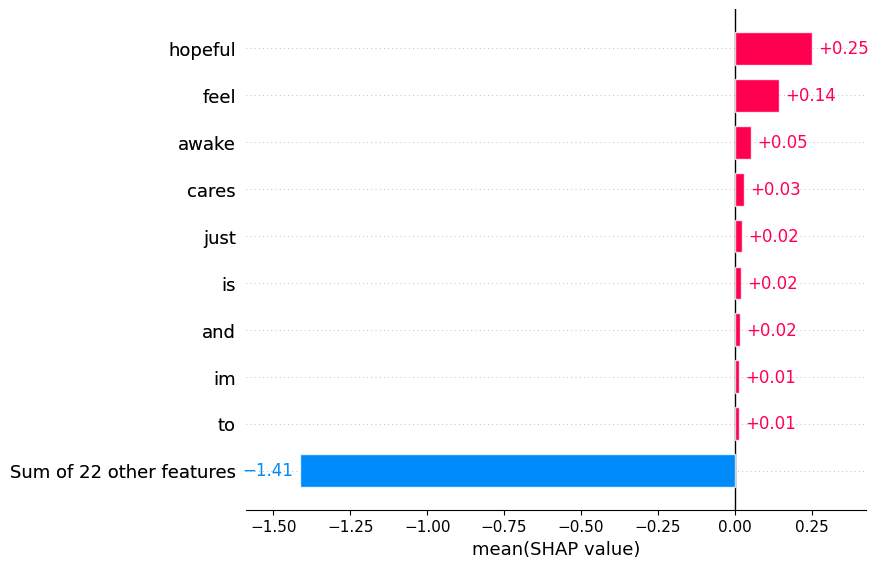

In [ ]:
# ...or acending order
shap.plots.bar(shap_values[:, :, "joy"].mean(0), order=shap.Explanation.argsort.flip)

In [ ]:
logit_explainer = shap.Explainer(shap.models.TransformersPipeline(pred, rescale_to_logits=True))

logit_shap_values = logit_explainer(data["text"][:3])
shap.plots.text(logit_shap_values)

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  67%|██████▋   | 2/3 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [01:31, 45.76s/it]


In [ ]:
# Load the sentiment analysis pipeline for binary classification
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# Define the input text
text_data = "Hugging Face transformers are absolutely brilliant!"

# Get predictions
predictions = model(text_data)

# Print the output
print(predictions)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[[{'label': 'NEGATIVE', 'score': 0.00013269631017465144}, {'label': 'POSITIVE', 'score': 0.99986732006073}]]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
# Example input text
text_data = ["Hugging Face transformers are absolutely brilliant!"]

# Compute SHAP values
shap_values = explainer(text_data)

# Visualize the explanation
shap.plots.text(shap_values[0,:,'POSITIVE'])

  0%|          | 0/72 [00:00<?, ?it/s]

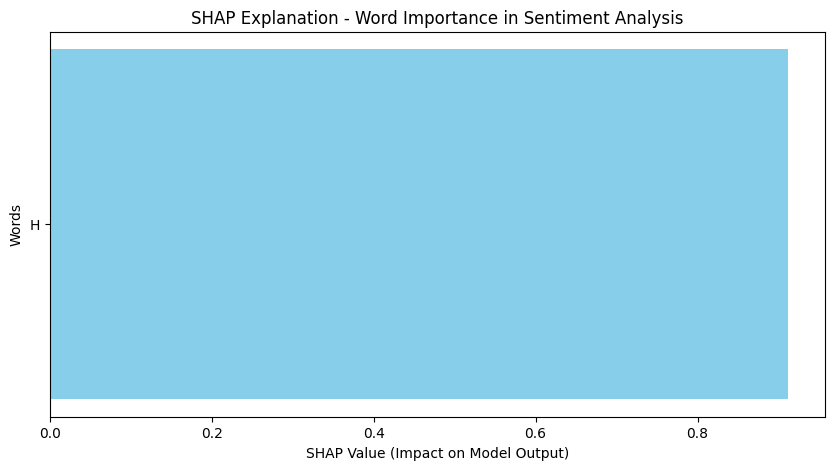

In [ ]:
# Convert SHAP values to a bar plot #check
shap_values_array = np.abs(shap_values.values).sum(axis=1)[0]  # Aggregate absolute SHAP values
words = text_data[0].split()  # Extract words from input text

# Plot the SHAP values as a bar plot
plt.figure(figsize=(10, 5))
plt.barh(words, shap_values_array, color="skyblue")
plt.xlabel("SHAP Value (Impact on Model Output)")
plt.ylabel("Words")
plt.title("SHAP Explanation - Word Importance in Sentiment Analysis")
plt.gca().invert_yaxis()  # Invert y-axis to match SHAP convention
plt.show()



In [ ]:
#zero shot classifier
# Loading the hugging face model and tokenizer
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained("valhalla/distilbart-mnli-12-3")
tokenizer = AutoTokenizer.from_pretrained("valhalla/distilbart-mnli-12-3")

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
# Create a custom pipeline that only requires the text parameter
# for the __call__ method and provides a method to set the labels
from transformers import ZeroShotClassificationPipeline
from typing import List, Union
class ZeroShotModelPipeline(ZeroShotClassificationPipeline):
    # Overwrite the __call__ method
    def __call__(self, *args):
        out = super().__call__(args[0], self.set_labels)[0]

        return [[{"label":x[0], "score": x[1]}  for x in zip(out["labels"], out["scores"])]]

    def set_labels(self, labels: Union[str,List[str]]):
        self.set_labels = labels

In [ ]:
def score_and_visualize(text, shap_values):
    prediction = pipe(text)
    print(f"Model predictions are: {prediction}")
    shap.plots.text(shap_values)

In [ ]:
text = ["I love playing cricket!"]
labels = ["insect","sports", "animal"]

In [ ]:
# Assign the labels for the classification model
model.config.label2id.update({v:k for k,v in enumerate(labels)})
model.config.id2label.update({k:v for k,v in enumerate(labels)})

In [ ]:
pipe = ZeroShotModelPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)
pipe.set_labels(labels)

Device set to use cpu


In [ ]:
# SHAP Explainer
explainer = shap.Explainer(pipe)
shap_values = explainer(text)

  0%|          | 0/42 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:10, 70.70s/it]               


In [ ]:
score_and_visualize(text, shap_values)

Model predictions are: [[{'label': 'sports', 'score': 0.8340925574302673}, {'label': 'insect', 'score': 0.1633768379688263}, {'label': 'animal', 'score': 0.0025305571034550667}]]
